In [5]:
%pip install -q torch 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
data=pd.read_csv("data.csv")

In [2]:
df=pd.DataFrame(data)

In [3]:
df.head()

,English,Hindi,Hinglish,Average rating,Disagreement,twitter_roberta,beto_sentiment,vader_sentiment
0,Program module is a file that contains instruc...,"माड्यूल, एक संचिका होती है, जिसमें या तो स्रोत...","module , ek program hoti hai , jismen ya to so...",7,6,neutral,neutral,neutral
1,And to Thamud We sent their brother Sali 'h. H...,और (हमने) क़ौमे समूद के पास उनके भाई सालेह को ...,aur hamne aume samood ke pas unke bhaee saleh ...,6,4,positive,neutral,positive
2,"and, when reminded, do not remember\n","और जब उन्हें याद दिलाया जाता है, तो वे याद नही...","aur jab unhen yad dilaya jata hai , to ve yad ...",10,0,neutral,neutral,neutral
3,you won the TED Prize 2011.\n,तुम्हें २०११ का टेड प्राइज़ मिल गया है.\n,tumhen २०११ ka ted prize mil gaya hai\n,9,1,positive,positive,positive
4,He gone to Kerodemal College of Delhi Universi...,उन्होंने बाद अध्ययन करने के लिए ये दिल्ली विश्...,unhonne bad science karne ke lie ye delhi univ...,7,0,neutral,neutral,neutral


## 1st model: Twitter RoBERTa

In [4]:
from transformers import pipeline

sentiment_analysis = pipeline('sentiment-analysis', model='cardiffnlp/twitter-roberta-base-sentiment-latest')

sentiments = []
for text in data['English']:
    result = sentiment_analysis(text)
    sentiments.append(result[0]['label'])

data['sentiment'] = sentiments


/Users/user/Desktop/Hinglish Sentimental Analysis/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification mode

In [5]:
data.rename(columns={'sentiment': 'twitter_roberta'}, inplace=True)

In [6]:
data.to_csv('data.csv', index=False)

In [7]:
data.head()

,English,Hindi,Hinglish,Average rating,Disagreement,twitter_roberta,beto_sentiment,vader_sentiment,twitter_roberta
0,Program module is a file that contains instruc...,"माड्यूल, एक संचिका होती है, जिसमें या तो स्रोत...","module , ek program hoti hai , jismen ya to so...",7,6,neutral,neutral,neutral,neutral
1,And to Thamud We sent their brother Sali 'h. H...,और (हमने) क़ौमे समूद के पास उनके भाई सालेह को ...,aur hamne aume samood ke pas unke bhaee saleh ...,6,4,positive,neutral,positive,positive
2,"and, when reminded, do not remember\n","और जब उन्हें याद दिलाया जाता है, तो वे याद नही...","aur jab unhen yad dilaya jata hai , to ve yad ...",10,0,neutral,neutral,neutral,neutral
3,you won the TED Prize 2011.\n,तुम्हें २०११ का टेड प्राइज़ मिल गया है.\n,tumhen २०११ ka ted prize mil gaya hai\n,9,1,positive,positive,positive,positive
4,He gone to Kerodemal College of Delhi Universi...,उन्होंने बाद अध्ययन करने के लिए ये दिल्ली विश्...,unhonne bad science karne ke lie ye delhi univ...,7,0,neutral,neutral,neutral,neutral


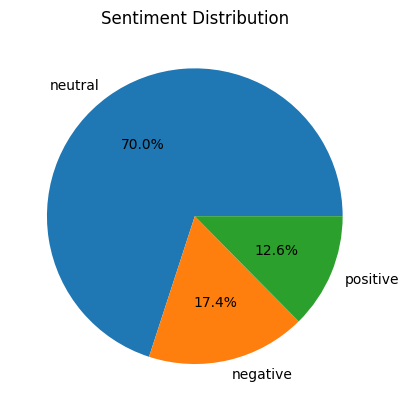

In [5]:
import matplotlib.pyplot as plt

# count the number of rows for each sentiment
counts = data['twitter_roberta'].value_counts()

# create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()


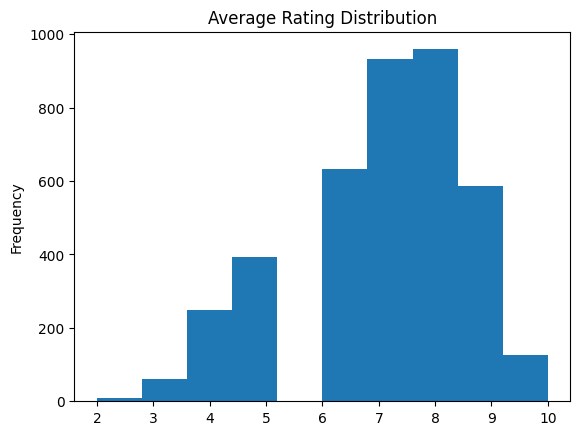

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# read the data.csv file
data_df = pd.read_csv('data.csv')

# plot the average rating column
data_df['Average rating'].plot(kind='hist')
plt.title('Average Rating Distribution')
plt.show()


## 2nd Model : beto Sentiment


In [8]:
import pandas as pd
from transformers import pipeline
# read the data.csv file
data_df = pd.read_csv('data.csv')

# create a sentiment analysis pipeline using the beto model
sentiment_analysis = pipeline('sentiment-analysis', model='finiteautomata/beto-sentiment-analysis')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [10]:

# predict the sentiment for each text in the english column
sentiments = []
for text in data_df['English']:
    result = sentiment_analysis(text)
    sentiments.append(result[0]['label'])

# add the predicted sentiments to the dataframe
data_df['beto_sentiment'] = sentiments


In [11]:
data_df.head()

,English,Hindi,Hinglish,Average rating,Disagreement,twitter_roberta,beto_sentiment,vader_sentiment,twitter_roberta.1
0,Program module is a file that contains instruc...,"माड्यूल, एक संचिका होती है, जिसमें या तो स्रोत...","module , ek program hoti hai , jismen ya to so...",7,6,neutral,NEU,neutral,neutral
1,And to Thamud We sent their brother Sali 'h. H...,और (हमने) क़ौमे समूद के पास उनके भाई सालेह को ...,aur hamne aume samood ke pas unke bhaee saleh ...,6,4,positive,NEU,positive,positive
2,"and, when reminded, do not remember\n","और जब उन्हें याद दिलाया जाता है, तो वे याद नही...","aur jab unhen yad dilaya jata hai , to ve yad ...",10,0,neutral,NEU,neutral,neutral
3,you won the TED Prize 2011.\n,तुम्हें २०११ का टेड प्राइज़ मिल गया है.\n,tumhen २०११ ka ted prize mil gaya hai\n,9,1,positive,POS,positive,positive
4,He gone to Kerodemal College of Delhi Universi...,उन्होंने बाद अध्ययन करने के लिए ये दिल्ली विश्...,unhonne bad science karne ke lie ye delhi univ...,7,0,neutral,NEU,neutral,neutral


In [12]:
data_df['beto_sentiment'] = data_df['beto_sentiment'].replace({'POS': 'positive', 'NEG': 'negative', 'NEU': 'neutral'})


In [13]:
data_df.to_csv('data.csv', index=False)


In [14]:
#read data.csv and print the first 5 rows
data_df = pd.read_csv('data.csv')
data_df.head()

,English,Hindi,Hinglish,Average rating,Disagreement,twitter_roberta,beto_sentiment,vader_sentiment,twitter_roberta.1
0,Program module is a file that contains instruc...,"माड्यूल, एक संचिका होती है, जिसमें या तो स्रोत...","module , ek program hoti hai , jismen ya to so...",7,6,neutral,neutral,neutral,neutral
1,And to Thamud We sent their brother Sali 'h. H...,और (हमने) क़ौमे समूद के पास उनके भाई सालेह को ...,aur hamne aume samood ke pas unke bhaee saleh ...,6,4,positive,neutral,positive,positive
2,"and, when reminded, do not remember\n","और जब उन्हें याद दिलाया जाता है, तो वे याद नही...","aur jab unhen yad dilaya jata hai , to ve yad ...",10,0,neutral,neutral,neutral,neutral
3,you won the TED Prize 2011.\n,तुम्हें २०११ का टेड प्राइज़ मिल गया है.\n,tumhen २०११ ka ted prize mil gaya hai\n,9,1,positive,positive,positive,positive
4,He gone to Kerodemal College of Delhi Universi...,उन्होंने बाद अध्ययन करने के लिए ये दिल्ली विश्...,unhonne bad science karne ke lie ye delhi univ...,7,0,neutral,neutral,neutral,neutral


In [15]:
!pip install vaderSentiment


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 723.9 kB/s eta 0:00:00a 0:00:01


In [16]:
# import the required libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# create an instance of the SentimentIntensityAnalyzer class
analyzer = SentimentIntensityAnalyzer()

# predict the sentiment for each text in the english column
sentiments = []
for text in data_df['English']:
    result = analyzer.polarity_scores(text)
    compound_score = result['compound']
    if compound_score > 0.05:
        sentiments.append('positive')
    elif compound_score < -0.05:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

# add the predicted sentiments to the dataframe
data_df['vader_sentiment'] = sentiments


In [17]:
data_df.head()

,English,Hindi,Hinglish,Average rating,Disagreement,twitter_roberta,beto_sentiment,vader_sentiment,twitter_roberta.1
0,Program module is a file that contains instruc...,"माड्यूल, एक संचिका होती है, जिसमें या तो स्रोत...","module , ek program hoti hai , jismen ya to so...",7,6,neutral,neutral,neutral,neutral
1,And to Thamud We sent their brother Sali 'h. H...,और (हमने) क़ौमे समूद के पास उनके भाई सालेह को ...,aur hamne aume samood ke pas unke bhaee saleh ...,6,4,positive,neutral,positive,positive
2,"and, when reminded, do not remember\n","और जब उन्हें याद दिलाया जाता है, तो वे याद नही...","aur jab unhen yad dilaya jata hai , to ve yad ...",10,0,neutral,neutral,neutral,neutral
3,you won the TED Prize 2011.\n,तुम्हें २०११ का टेड प्राइज़ मिल गया है.\n,tumhen २०११ ka ted prize mil gaya hai\n,9,1,positive,positive,positive,positive
4,He gone to Kerodemal College of Delhi Universi...,उन्होंने बाद अध्ययन करने के लिए ये दिल्ली विश्...,unhonne bad science karne ke lie ye delhi univ...,7,0,neutral,neutral,neutral,neutral


In [18]:
data_df.to_csv('data.csv', index=False)


In [19]:
data_df.head()

,English,Hindi,Hinglish,Average rating,Disagreement,twitter_roberta,beto_sentiment,vader_sentiment,twitter_roberta.1
0,Program module is a file that contains instruc...,"माड्यूल, एक संचिका होती है, जिसमें या तो स्रोत...","module , ek program hoti hai , jismen ya to so...",7,6,neutral,neutral,neutral,neutral
1,And to Thamud We sent their brother Sali 'h. H...,और (हमने) क़ौमे समूद के पास उनके भाई सालेह को ...,aur hamne aume samood ke pas unke bhaee saleh ...,6,4,positive,neutral,positive,positive
2,"and, when reminded, do not remember\n","और जब उन्हें याद दिलाया जाता है, तो वे याद नही...","aur jab unhen yad dilaya jata hai , to ve yad ...",10,0,neutral,neutral,neutral,neutral
3,you won the TED Prize 2011.\n,तुम्हें २०११ का टेड प्राइज़ मिल गया है.\n,tumhen २०११ ka ted prize mil gaya hai\n,9,1,positive,positive,positive,positive
4,He gone to Kerodemal College of Delhi Universi...,उन्होंने बाद अध्ययन करने के लिए ये दिल्ली विश्...,unhonne bad science karne ke lie ye delhi univ...,7,0,neutral,neutral,neutral,neutral


In [20]:

import pandas as pd

    # read the data.csv file
data_df = pd.read_csv('data.csv')

# create a new dataframe with only the required columns
new_df = data_df[['English', 'twitter_roberta', 'beto_sentiment', 'vader_sentiment']]

new_df = new_df[new_df['twitter_roberta'] == new_df['beto_sentiment']]
new_df = new_df[new_df['twitter_roberta'] == new_df['vader_sentiment']]

    # write the updated dataframe to a new csv file
new_df.to_csv('same_sentiment_rows.csv', index=False)
#add the hindi and hinglish columns to the new dataframe
new_df['Hindi'] = data_df['Hindi']
new_df['Hinglish'] = data_df['Hinglish']
#save the new dataframe to a new csv file
new_df.to_csv('same_sentiment_rows.csv', index=False)

In [21]:
# read the same_sentiment_rows.csv file
df = pd.read_csv('same_sentiment_rows.csv')

# reposition the Hindi and Hinglish columns to the 2nd and 3rd columns respectively
df = df.reindex(columns=['English', 'Hindi', 'Hinglish', 'twitter_roberta', 'beto_sentiment', 'vader_sentiment'])

# write the updated dataframe to the same csv file
df.to_csv('same_sentiment_rows.csv', index=False)


## custom model


In [66]:
import pandas as pd

# Load the CSV data
data = pd.read_csv('same_sentiment_rows.csv')

# Concatenate English and Hinglish columns
data['combined_text'] = data['English'] + " " + data['Hinglish']

# Select the features and labels
X = data['combined_text']
y = data['vader_sentiment']


In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load your dataset (CSV file)
df = pd.read_csv('same_sentiment_rows.csv')

# Assuming your CSV has columns 'Hinglish' and 'Vader_sentiment'
X = df['Hinglish'].values
y = df['vader_sentiment'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load a pre-trained Hinglish sentiment analysis model and tokenizer
model_name = "ai4bharat/indic-bert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize the data
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, return_tensors='pt', max_length=128)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, return_tensors='pt', max_length=128)

# Create DataLoader for training and testing data
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(y_test, dtype=torch.long))

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Set up optimizer and training parameters
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")

# Evaluation
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_labels = logits.argmax(dim=1)
        predictions.extend(predicted_labels.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = np.mean(predictions == true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Function to predict sentiment
def predict_sentiment(model, tokenizer, text):
    encoded_text = tokenizer(text, padding=True, truncation=True, return_tensors="pt", max_length=128)
    with torch.no_grad():
        model.eval()
        input_ids = encoded_text['input_ids'].to(device)
        attention_mask = encoded_text['attention_mask'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        sentiment = "Positive" if logits[0][1] > logits[0][0] else "Negative"
        return sentiment

# Example usage
user_input = "Your Hinglish sentence here."
predicted_sentiment = predict_sentiment(model, tokenizer, user_input)
print(f"Predicted Sentiment: {predicted_sentiment}")


ValueError: Couldn't instantiate the backend tokenizer from one of: 
(1) a `tokenizers` library serialization file, 
(2) a slow tokenizer instance to convert or 
(3) an equivalent slow tokenizer class to instantiate and convert. 
You need to have sentencepiece installed to convert a slow tokenizer to a fast one.

In [ ]:
# Function to predict sentiment
def predict_sentiment(model, text):
    encoded_text = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        model.eval()
        inputs = {"input_ids": encoded_text.input_ids, "attention_mask": encoded_text.attention_mask}
        outputs = model(**inputs)
        logits = outputs.logits
        sentiment = "Positive" if logits[0][1] > logits[0][0] else "Negative"
        return sentiment

# Example usage
user_input = input()
predicted_sentiment = predict_sentiment(model, user_input)
print(f"Predicted Sentiment: {predicted_sentiment}")
